Kristen Swerzenski

DSC 530

Final Project

## Introduction

Climate change is becoming an increasing threat to coastal communities. Between rising ocean temperatures and levels, as well as increasing frequency and intensity of catastrophic weather events such as hurricanes, there has been an increased interest in these coastal communities to find ways to more effectively to protect coastlines and attempt to prevent substantial property losses when extreme weather events do occur. In Florida, one of the most popular forms of this coastal armoring are vertical seawalls which replace natural dunes with a hard structure to absorb impacts of wave action and resist storm surge. While these seawalls have been seen to be effective in protecting infrastructure there is increasing evidence that they accelerate erosion and will ultimately lead to more rapidly deteriorating coastlines. In addition, their effects on coastal and beach ecosystems are not well studied and understood, and being that Florida beaches serve as some of the most important nesting habitat in the world for endangered species of sea turtles, it is imperative that we understand how these structures are interacting with these ecosystems and impacting the plants and animals that depend on it.


### Research Question

How does the presence of hard coastal armoring, such as vertical seawalls, affect sea turtle nest success?

### Data and Variables

For this exploratory data analysis, I am using a dataset of sea turtle nesting activity from 2022 on a 5-mile stretch of beach monitored by the Disney Conservation Team. The data is collected as a part of Florida Fish and Wildlife's Statewide Nesting Beach Survey and is used to understand different aspects of the nesting sea turtle populations along Florida's coastlines. Along this study site, there are sample sites of both  armored coastline and unarmored coastline which will be the main focus of this analysis.

I will be utilizing the following variables for this project: 
 
 
 | Variable | Explanation |
| --- | --- |
| `SurveyZone` | Indicates the geographic zone in which the crawl was located. This variable will be used to distinguish betweem our samples of armored beach and unarmored beach. Zone numbers are determined by the county. |
| `Nest_FC` | Whether or not the crawl resulted in the sea turtle laying a nest. N indicates nest, FC indicates false crawl (or a non-nesting crawl). |
| `ClutchDepth_m` | How deep (in meters) the initial clutch of eggs was laid. Distance is measured to the top egg of the clutch. |
| `HS` | Hatch success. A calculated value indicating the percentage of eggs in the nest that successfully hatched.|
| `ES` | Emergence success. A calculated value incidating the percentage of sea turtle hatchlings that successfully emerged from the nest. |
| `DuneDistance_m` | Distance of the nest to the toe of the dune, in meters. Good for measuring the position of the nest on the beach. |
| `IncubationPeriod` | How long the nest incubated for (measured in days). | 

The last five variables are what will mainly be used for analysis. The first three will be used to sort, group, and organize the data. 

In [1]:
# Downloading and importing necessary packages
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
import thinkstats2
import thinkplot

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Reading data and checking that it was brought in correctly
data = pd.read_excel('2022_CrawlData_A.xlsx')
data.head()

,OBJECTID,CrawlYear,DayofYear,CrawlDate,CrawlDateText,CrawlTime,MgmtArea,SurveyArea,SurveyZone,Lat,...,InventoryComments,NestInventoried,Accreted,AmountofAccretion,IncubationPeriod,ClutchSize,UnhatchedSum,HatchlingSum,HS,ES
0,1.0,2022.0,292.0,2022-10-19,10/19/2022,07:56,IRS,Indian River Shores (Baytree),17,27.717601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2022.0,290.0,2022-10-17,10/17/2022,09:13,IRS,Indian River Shores (Baytree),17,27.719273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2022.0,290.0,2022-10-17,10/17/2022,07:44,DISNEY,Wabasso,10F,27.758017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2022.0,282.0,2022-10-09,10/9/2022,07:44,DISNEY,Indian River Shores (North),11S,27.754296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2022.0,280.0,2022-10-07,10/7/2022,09:13,IRS,Indian River Shores (Baytree),13S,27.749585,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Cleaning and filtering the data to only include relevant rows of crawls that resulted in nests
nest_data = data[data['NestType'] == 'REP']
nest_data.head()

,OBJECTID,CrawlYear,DayofYear,CrawlDate,CrawlDateText,CrawlTime,MgmtArea,SurveyArea,SurveyZone,Lat,...,InventoryComments,NestInventoried,Accreted,AmountofAccretion,IncubationPeriod,ClutchSize,UnhatchedSum,HatchlingSum,HS,ES
8,4240.0,2022.0,150.0,2022-05-30,5/30/2022,06:39,DISNEY,Wabasso,09S,27.765231,...,Final stake height: 0.50,Y,NaN,NaN,58.0,111.0,8.0,1.0,92.792793,91.891892
19,4598.0,2022.0,140.0,2022-05-20,5/20/2022,06:46,DISNEY,Wabasso,09G,27.767348,...,NaN,Y,NaN,NaN,56.0,88.0,16.0,1.0,81.818182,80.681818
23,1330.0,2022.0,199.0,2022-07-18,7/18/2022,07:33,DISNEY,Wabasso,10F,27.758060,...,Water inundated,Y,NaN,NaN,70.0,45.0,45.0,0.0,0.000000,0.000000
31,71.0,2022.0,242.0,2022-08-30,8/30/2022,08:30,IRS,Indian River Shores (Baytree),16,27.722126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,3213.0,2022.0,171.0,2022-06-20,6/20/2022,08:43,IRS,Indian River Shores (Baytree),13S,27.750117,...,NaN,Y,NaN,NaN,61.0,64.0,2.0,3.0,96.875000,92.187500


### Histograms and Descriptive Statistics

Because most variables are continuous, the thinkstats code for histograms was giving me some trouble so I had to use matplot to bin and plot the data.

#### Variable 1 - ClutchDepth_m

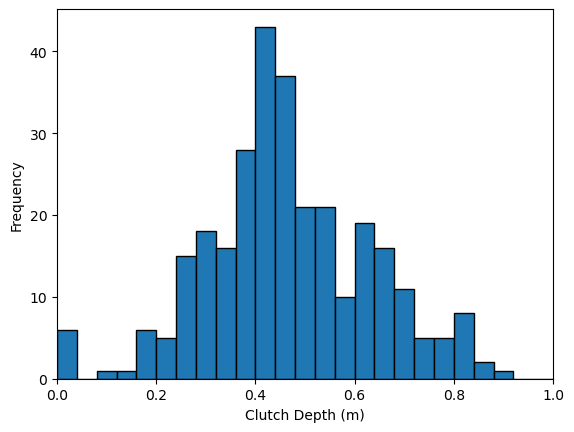

In [6]:
# Using matplot to plot a histogram of Clutch Depth with 50 bins
plt.hist(nest_data['ClutchDepth_m'], bins=50, edgecolor='black', range=(0, 2))
plt.xlabel('Clutch Depth (m)')
plt.ylabel('Frequency')
plt.xlim(0, 1) 
plt.show()

In [7]:
# Calculating mean
nest_data.ClutchDepth_m.mean()

0.46074579661016957

In [8]:
# Calculating mode
nest_data.ClutchDepth_m.mode()

0    0.42
Name: ClutchDepth_m, dtype: float64

In [9]:
# Calculating median
nest_data.ClutchDepth_m.median()

0.45

In [10]:
# Calculating variance
nest_data.ClutchDepth_m.var()

0.02837219971900607

In [11]:
# Calculating standard deviation
nest_data.ClutchDepth_m.std()

0.16844049310960257

Overall, clutch depth appears to have a relative normal distribution with a very close mean and median. Standard deviation is 0.17, meaning that the average nest deviates from the mean by rougly 0.17 meters which is a decent amount of variation being that most all clutch depths are between 0-1m. 

#### Variable 2 - Hatching Success

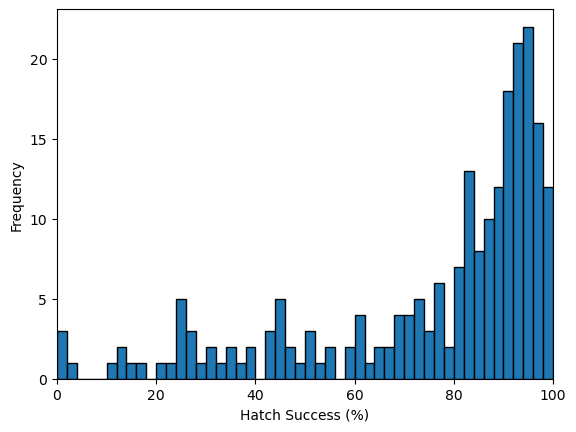

In [12]:
# Using matplot to plot a histogram of Hatching Success with 50 bins
plt.hist(nest_data['HS'], bins=50, edgecolor='black')
plt.xlabel('Hatch Success (%)')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

In [13]:
# Calculating mean
nest_data.HS.mean()

75.71324274281645

In [14]:
# Calculating mode
nest_data.HS.mode()

0    83.333333
Name: HS, dtype: float64

In [15]:
# Calculating median
nest_data.HS.median()

86.13861386138613

In [16]:
# Calculating variance
nest_data.HS.var()

626.5103453442857

In [17]:
# Calculating standard deviation
nest_data.HS.std()

25.030188679758005

Hatch success is a variable measured in percentage and shows a rather extreme negative skew, indicating that most values fall towards the right side of the distribution. In this case, it means that the majority of nests in the sample had a relatively high hatch success rate. The median is larger than the mean, supporting this observation, but standard deviation is about 25% which indicates a lot of variability or a high influence of outliers on the dataset. 

#### Variable 3 - Emergence Success

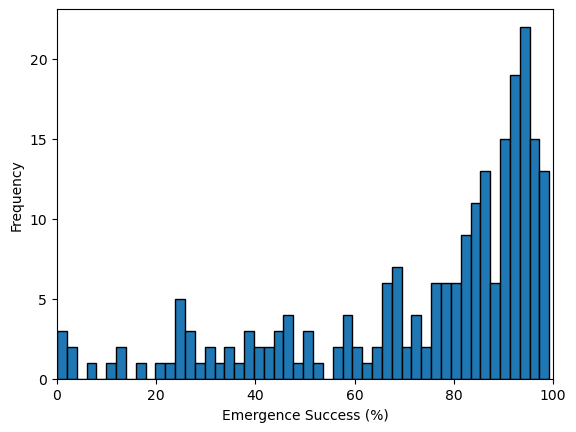

In [18]:
# Using matplot to plot a histogram of Emergence Success with 50 bins
plt.hist(nest_data['ES'], bins=50, edgecolor='black')
plt.xlabel('Emergence Success (%)')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

In [19]:
# Calculating mean
nest_data.ES.mean()

73.82214859885741

In [20]:
# Calculating mode
nest_data.ES.mode()

0    0.0
Name: ES, dtype: float64

In [21]:
# Calculating median
nest_data.ES.median()

84.21052631578947

In [22]:
# Calculating variance
nest_data.ES.var()

647.5360290467065

In [23]:
# Calculating standard deviation
nest_data.ES.std()

25.446729240645183

Similar to hatch success, emergence success is also a variable measured in percentage and shows a rather extreme negative skew. While hatch success measures the success of eggs hatching, emergence success measures how successful the hatchlings were at exiting the nest. The summary statistics are very similar to hatch success, with a higher median than mean and an almost identical standard deviation.

#### Variable 4 - Distance to Dune

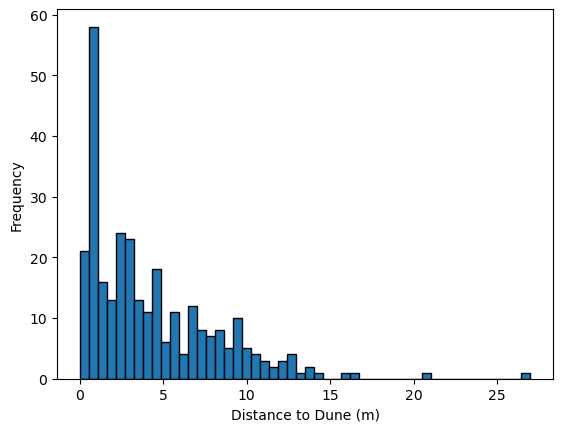

In [24]:
# Using matplot to plot a histogram of Distance to Dune with 50 bins
plt.hist(nest_data['DuneDistance_m'], bins=50, edgecolor='black')
plt.xlabel('Distance to Dune (m)')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Calculating mean
nest_data.DuneDistance_m.mean()

4.323703737373737

In [26]:
# Calculating mode
nest_data.DuneDistance_m.mode()

0    0.0
Name: DuneDistance_m, dtype: float64

In [27]:
# Calculating median
nest_data.DuneDistance_m.median()

3.12

In [28]:
# Calculating variance
nest_data.DuneDistance_m.var()

15.817569052202538

In [29]:
# Calculating standard deviation
nest_data.DuneDistance_m.std()

3.9771307562365283

The distance to dune gives us a relative idea of the nest's location on the beach in relation to the dunes. The greater the distance, the closer to the water line the nest is. The distribution of distance to dune is positively skewed, meaning the majority of values are located to the left. This is supported by the median being less than the mean. The standard deviation is about 4 meters, indicating a decent amount of variability and a stronger influence of larger outliers.

#### Variable 5 - Incubation Period

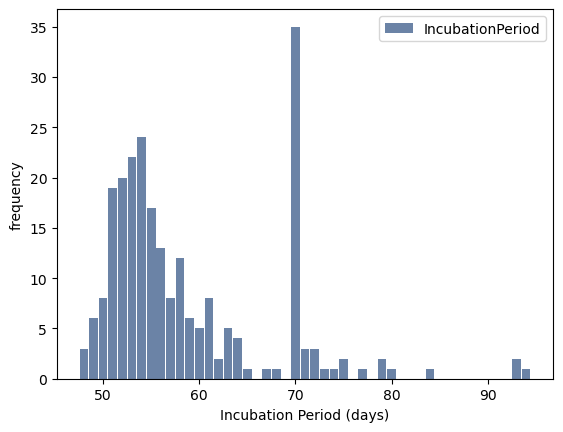

In [30]:
# Using thinkstats to plot a histogram of incubation period
hist5 = thinkstats2.Hist(nest_data.IncubationPeriod, label='IncubationPeriod')
thinkplot.Hist(hist5)
thinkplot.Config(xlabel='Incubation Period (days)', ylabel='frequency')

In [31]:
# Calculating mean
nest_data.IncubationPeriod.mean()

58.890756302521005

In [32]:
# Calculating mode
nest_data.IncubationPeriod.mode()

0    70.0
Name: IncubationPeriod, dtype: float64

In [33]:
# Calculating median
nest_data.IncubationPeriod.median()

55.5

In [34]:
# Calculating variance
nest_data.IncubationPeriod.var()

75.4394922525972

In [35]:
# Calculating standard deviation
nest_data.IncubationPeriod.std()

8.685591070997829

At first glance this variable of nest incubation appears to be skewed. However, all nests are excavated at 70 days, so if a hatch wasn't observed at the nest the incubation period automatically defaults to 70 days. However, 70-day incubation could mean that wither no hatch ocurred or an unobserved hatch occurred at an unknown date, meaning that 70-day incubation periods are most likely not reliable though extra cleaning of the dataset would be needed to determine which ones are true 70-day incubations. Anything above 70-days represents a different species of sea turtle who's nest has a longer incubation period, so species will have to be taken into account as well (though sample size for this particular species on this beach is too small to do any analysis with). Median is one of the most useful summary statistics, and a 55.5 day incubation period is right on par with other studies that have looked at overall incubation period for nests in this area. Standard deviation is also a little high at 8.7 days, but correcting the outliers would most likely lessen that.

### Probability Mass Functions

#### Scenario 1: Comparing Nest Depths on Armored Beach (SurveyZones 9S-9G)  and Unarmored Beach (SurveyZone 17)

The basis of my research question is to investigate whether or not nests laid on armored beach are differ from nests laid on unarmored beach. This first PMF compares the depth at which the eggs were laid on these two different treatment beaches. 

In [36]:
# Splitting the data between nests on armored beach and nests on unarmored beach
armored = nest_data[nest_data['SurveyZone'].isin(['16','17'])]
unarmored = nest_data[nest_data['SurveyZone'].isin(['09S','09G'])]

In [37]:
# Using thinkstats to calculate PMFs
armored_pmf = thinkstats2.Pmf(armored.ClutchDepth_m, label="armored")
unarmored_pmf = thinkstats2.Pmf(unarmored.ClutchDepth_m, label="unarmored")

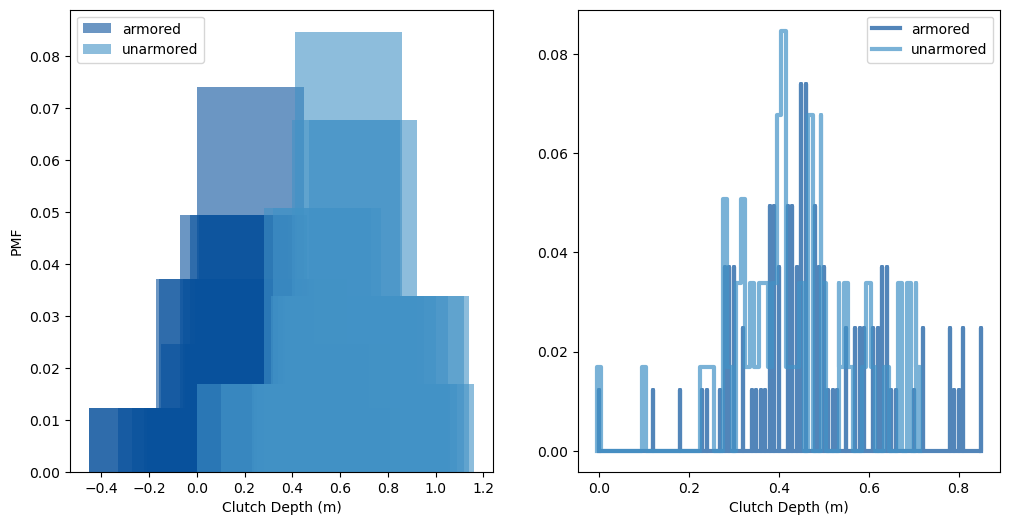

In [38]:
# Using thinkstats to plot PMFs
width = 0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(armored_pmf, align="right", width=width)
thinkplot.Hist(unarmored_pmf, align="left", width=width)
thinkplot.Config(xlabel="Clutch Depth (m)", ylabel="PMF")

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([armored_pmf, unarmored_pmf])
thinkplot.Config(xlabel="Clutch Depth (m)")

Spread of the probability mass functions is relatively similar beetween armored beach and unarmored beach. There appears to potentially be some higher outliers on armored beach, indicating a few nests that were laid deeper, but overall there is little to no distinguishing characteristics between the two PMFs.

#### Scenario 2: Comparing Incubtion Period on Armored Beach (SurveyZones 9S-9G)  and Unarmored Beach (SurveyZone 17)

Another thing that can vary quite a bit with sea turtle nests is the incubation period. A variety of factors can influence this, including incubation temperature, beach and environmental conditions, and time of the season. Armored beach typicallly faces accelerated erosion and higher levels of tidal washovers of nests that can impact how the nest incubates. This PMF compares the incubation periods of nests on armored beach and unarmored beach.

In [39]:
# Using thinkstats to calculate PMFs
armored_pmf_inc = thinkstats2.Pmf(armored.IncubationPeriod, label="armored")
unarmored_pmf_inc = thinkstats2.Pmf(unarmored.IncubationPeriod, label="unarmored")

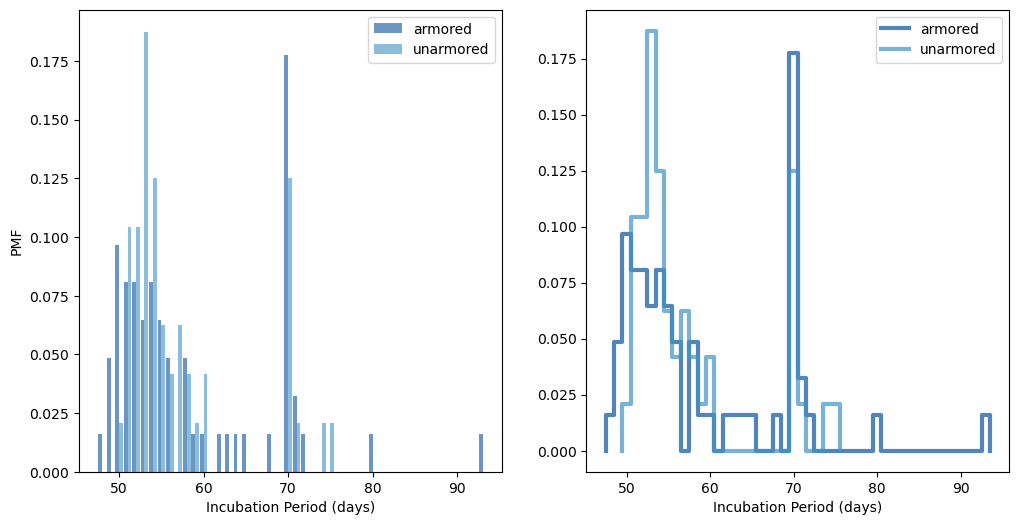

In [40]:
# Using thinkstats to plot PMFs
width = 0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(armored_pmf_inc, align="right", width=width)
thinkplot.Hist(unarmored_pmf_inc, align="left", width=width)
thinkplot.Config(xlabel="Incubation Period (days)", ylabel="PMF")

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([armored_pmf_inc, unarmored_pmf_inc])
thinkplot.Config(xlabel="Incubation Period (days)")

In these PMFs, we se a slight difference in incubation periods between nests laid on armoredbeaches and unarmored beaches. It appears that most nests on armored beaches have relatively lower incubation periods as opposed to nests laid on armored beaches,  indicating that they may be hatching sooner than nests laid on armored beaches. The spike at 70 days is due to the fact that all nests are inventoried at 70 days regardless of whether or not a hatch was observed, so anything 70-days or over should be ignored in this data. The few high outliers indicate a species of turtle with longer incubation periods, however their nests are uncommon on these beaches,

### Culmulative Distribution Function

Below I plotted two culmulative distribution functions for hatch success of nests on armored beach and nests on unarmored beach:

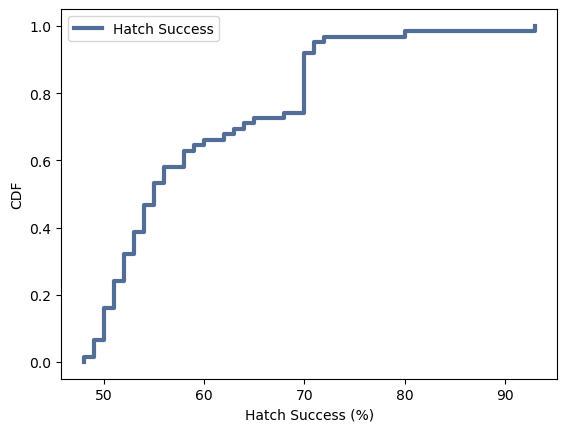

In [41]:
# Using thinkstats to plot CDF of Hatch Success for armored beach sample
cdf_arm = thinkstats2.Cdf(armored.IncubationPeriod, label='Hatch Success')
thinkplot.Cdf(cdf_arm)
thinkplot.Config(xlabel='Hatch Success (%)', ylabel='CDF', loc='upper left')

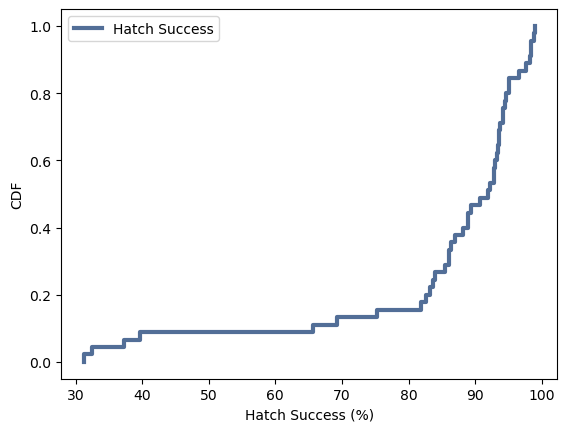

In [42]:
# Using thinkstats to plot CDF of unarmored beach sample
cdf_unarm = thinkstats2.Cdf(unarmored.HS, label='Hatch Success')
thinkplot.Cdf(cdf_unarm)
thinkplot.Config(xlabel='Hatch Success (%)', ylabel='CDF', loc='upper left')

The armored CDF appears to overall have more nests with lower hatch success rates than nests laid on unarmored beach. The unarmored beach CDF curve stays relatively low among lower hatch success rates before increasing drastically between 80-100%. A general opposite trend is seen on the armored beach, where the greatest increase in the curve is seen between 50-70% hatch success rate. This indicates that there may be a difference in nest hatch success between nests laid on armored beahc and unarmored beach.

### Analytical Distribution

Based on the roughly exponential shape of the armored Hatch Success CDF, I chose to plot an exponential anayytical distribution of harch success on armored beach (complementary CDF):

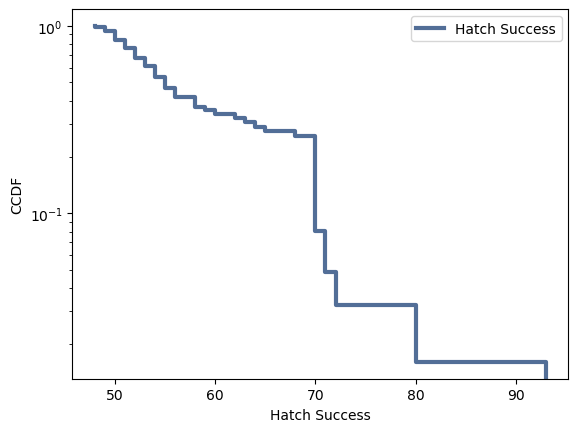

In [43]:
# Using thinkstats code to plot CCDF (exponential distribution)
thinkplot.Cdf(cdf_arm, complement=True)
thinkplot.Config(
    xlabel="Hatch Success",
    ylabel="CCDF",
    yscale="log",
    loc="upper right",
)

By looking at this analytical distribution, we learn a little more about how the hatch success variable is distributed for armored nests. It starts with a fairly steady decrease before exhibiting several drastic drops towards the end, which could tell us a number of things. Most likely given what I already know about this distribution, it indicates the presence of several influential outliers in the data. However, it ould also indicate that the data is a mix of distributions and that depending on what I'm looking at in the sample could change the type of model that is best fit for this data. 

### Scatterplots

Covariance, Correlation, and Spearman's Correlation functions from thinkstats:

In [44]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [45]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [46]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [47]:
# Further transforming and cleaning data to only include nests that were inventoried to avoid missing values
nest_data_inv = nest_data[nest_data['NestInventoried'] == 'Y']
nest_data_inv = nest_data_inv.dropna(subset=['ClutchDepth_m'])

#### Scatterplot 1: Hatch Success vs. Distance to Dune

While my research question focuses on differences between nests on armored beach and unarmored beach, it is important to look at the big picture of how all fo the variables relate to one another. The first scatterplot I chose to visualize with a scatterplot is the relationship between nest hatch success and the distance the nest was in relation to the dune. In general, beach armored with a seawall has overall less viable nesting habitat, and "distance to dune" gives us an idea of the nest's location on the beach in relation to the dune line (or seawall). 

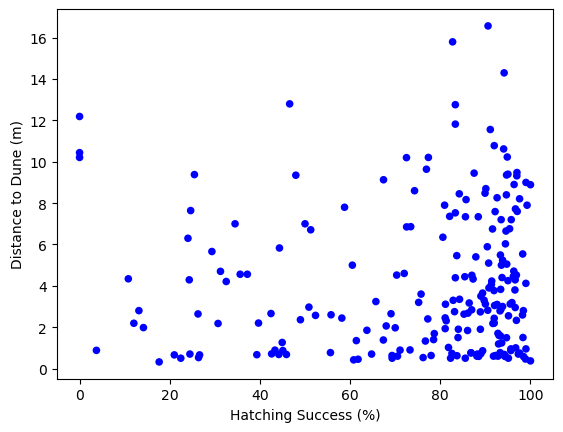

In [48]:
#Plotting scatterplot of Hatch Success vs Distance to Dune using cleaned data from only nests inventoried
thinkplot.Scatter(nest_data_inv.HS, nest_data_inv.DuneDistance_m, alpha=1)
thinkplot.Config(xlabel='Hatching Success (%)',
                 ylabel='Distance to Dune (m)')

In [49]:
# Calculating covariance
Cov(nest_data_inv.DuneDistance_m, nest_data_inv.HS)

3.5783722012019137

In [50]:
# Calculating Pearson's correlation coefficient
Corr(nest_data_inv.DuneDistance_m, nest_data_inv.HS)

0.041765905320439466

In [51]:
# Calculating Spearman's Correlation
SpearmanCorr(nest_data_inv.DuneDistance_m, nest_data_inv.HS)

0.10011545346270187

Based on these results, there may be a very, very slight positive correlation betwenn these two variables (correlation=0.04, Spearman's Correlation=0.1), however looking at the scatterplot any relationship between these two variables is rather imperceptible. That doesn't mean we can't rule out nonlinear relationships, as there still could be a nonlinear relatoinshp between thes variables that warrants further investigation - for instance, looking at the scatterplots there does appear to be a rather large congregation of points in the lower right quadrant indicating nests that are located closer to the dunes and have relatively high hatch success rates, so that could be something to look into further and see if a nonlinear relationship does exist.

#### Scatterplot 2: Incubation Period vs. Clutch Depth

The second scatterplot I chose to plot is the relationship between incubation period and clutch depth. A lot of environmental factors affect how a nest incubates, and how deep the turtle laid her eggs could determine how much these factors affect incubation and nest success. For instance, nests laid at a hallower clutch depth are more likely to vary with ambient beach temperature which could speed up incubation (or even lead to total nest mortality in cases of extreme, consistent heat exposure). 

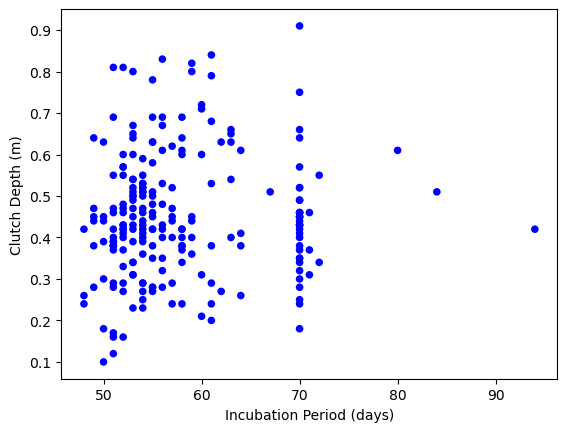

In [52]:
# Plotting scatterplot for nest incubation period vs. clutch depth using cleaned data from only nests inventoried
thinkplot.Scatter(nest_data_inv.IncubationPeriod, nest_data_inv.ClutchDepth_m, alpha=1)
thinkplot.Config(xlabel='Incubation Period (days)',
                 ylabel='Clutch Depth (m)',)

In [53]:
# Calculating covariance
Cov(nest_data_inv.IncubationPeriod, nest_data_inv.ClutchDepth_m)

0.07533558516294488

In [54]:
# Calculating Pearson's correlation coefficient
Corr(nest_data_inv.IncubationPeriod, nest_data_inv.ClutchDepth_m)

0.06581437507360208

In [55]:
# Calculating Spearman's Correlation
SpearmanCorr(nest_data_inv.IncubationPeriod, nest_data_inv.ClutchDepth_m)

0.09647501434964356

Again, we see little to no evidence of a linear relationship between clutch depth and incubation period. However, the 70-day nest outliers may be having an impact on this data, and being that 70-day nests are unreliable we may chose to disclude them from certain analyses. Both the correlation coefficient and the Spearman's correlation show, if anything, a very weak positive relationship, though the realtionship is almost negligible. Moving forward, to get a more accurate depiction of these variables' relationships I may want to choose discluding any nests with incubation periods of 70-days or more.

### Hypothesis Test

For my hypothesis test, I chose a permutation test to see if there is a difference between the mean incubation period of nests laid on armored beach vs. nests laid on unarmored beach. Incubation period is a very important variable to look at when comapring nest performance, as longer incubation periods tend to indicate that the nests incubated at cooler temperatures which could ultimately be better for sea turtle populations due to the fact that sea turtles have temperature-dependent sex determination. What this means is that depending on how warm the eggs are during development will determine whether or not the sea turtles develop into males or females. As ambient beach temperatures warm we are seeing most nests hatch as all females which will skew the populations and could ultimately lead to an extinction event due to genetic bottlenecking with not enough males to reproduce in the population. Vertical seawalls do provide more natural shading to beaches, and more nests on armored beaches run the risk of being washed over by tides due to the narrower beach - both of these phenomena could cool the nests down and actually beneift sea turtle populations.

**Null Hypothesis:** There is no difference in the average incubation period between sea turtle nests laid on armored beach and sea turtle nests laid on unarmored beach.

**Alternative Hypothesis:** There is a difference in the average incubation period between sea turtle nests laid on armored beach and sea turtle nests laid on unarmored beach.

In [56]:
# Thinkstats code for permutation test
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [57]:
# Dropping empty values from armored and unarmored nests
armored = armored.dropna(subset=['IncubationPeriod'])
unarmored = unarmored.dropna(subset=['IncubationPeriod'])

In [58]:
# Loading the data into a variable
hyptest_data = armored.IncubationPeriod, unarmored.IncubationPeriod

In [59]:
# Running the two-sided hypothesis test
ht = DiffMeansPermute(hyptest_data)
pvalue = ht.PValue()
pvalue

0.322

With a p-value of 0.329, we accept the null hypothesis in that there is no statistically significant difference between incubation period of nests laid on armored beach and nests laid on unarmored beach.

In [60]:
# Attempting a one-sided permutation test to see if there is any difference in a certain direction 
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat

In [61]:
# Running the one-sided permutation test
ht = DiffMeansOneSided(hyptest_data)
pvalue = ht.PValue()
pvalue

0.167

While the one-sided test has a lower p-value than the two-sided test, it is still not significant.

### Regression Analysis

Before running a regression analysis, I must perform some transformations on the data to include whether or not a nest is on armored beach in the data frame. To do this, I created an additional boolean variable that indicates whether or not the nest is on armored beach:

In [62]:
# Define the conditions for armored and unarmored beaches
armored_conditions = (nest_data_inv['SurveyZone'].isin(['09G', '09S']))
unarmored_conditions = (nest_data_inv['SurveyZone'].isin(['16', '17']))

# Create a new column 'Armored' based on the conditions
nest_data_inv['Armored'] = False  # Initialize with a default value (False for unarmored)
nest_data_inv.loc[armored_conditions, 'Armored'] = True

# Checking the updated DataFrame
nest_data_inv.head()

,OBJECTID,CrawlYear,DayofYear,CrawlDate,CrawlDateText,CrawlTime,MgmtArea,SurveyArea,SurveyZone,Lat,...,NestInventoried,Accreted,AmountofAccretion,IncubationPeriod,ClutchSize,UnhatchedSum,HatchlingSum,HS,ES,Armored
8,4240.0,2022.0,150.0,2022-05-30,5/30/2022,06:39,DISNEY,Wabasso,09S,27.765231,...,Y,NaN,NaN,58.0,111.0,8.0,1.0,92.792793,91.891892,True
19,4598.0,2022.0,140.0,2022-05-20,5/20/2022,06:46,DISNEY,Wabasso,09G,27.767348,...,Y,NaN,NaN,56.0,88.0,16.0,1.0,81.818182,80.681818,True
23,1330.0,2022.0,199.0,2022-07-18,7/18/2022,07:33,DISNEY,Wabasso,10F,27.758060,...,Y,NaN,NaN,70.0,45.0,45.0,0.0,0.000000,0.000000,False
65,3213.0,2022.0,171.0,2022-06-20,6/20/2022,08:43,IRS,Indian River Shores (Baytree),13S,27.750117,...,Y,NaN,NaN,61.0,64.0,2.0,3.0,96.875000,92.187500,False
70,2977.0,2022.0,176.0,2022-06-25,6/25/2022,08:42,IRS,Indian River Shores (Baytree),13S,27.750027,...,Y,NaN,NaN,56.0,60.0,4.0,9.0,93.333333,78.333333,False


In [63]:
target_zones = ['09G', '09S', '16', '17']

# Filter the DataFrame based on the target zones I want to include
nest_data_inv = nest_data_inv[nest_data_inv['SurveyZone'].isin(target_zones)]

# Checking the filtered DataFrame
nest_data_inv.head()

,OBJECTID,CrawlYear,DayofYear,CrawlDate,CrawlDateText,CrawlTime,MgmtArea,SurveyArea,SurveyZone,Lat,...,NestInventoried,Accreted,AmountofAccretion,IncubationPeriod,ClutchSize,UnhatchedSum,HatchlingSum,HS,ES,Armored
8,4240.0,2022.0,150.0,2022-05-30,5/30/2022,06:39,DISNEY,Wabasso,09S,27.765231,...,Y,NaN,NaN,58.0,111.0,8.0,1.0,92.792793,91.891892,True
19,4598.0,2022.0,140.0,2022-05-20,5/20/2022,06:46,DISNEY,Wabasso,09G,27.767348,...,Y,NaN,NaN,56.0,88.0,16.0,1.0,81.818182,80.681818,True
96,3288.0,2022.0,169.0,2022-06-18,6/18/2022,11:55,IRS,Indian River Shores (Baytree),17,27.712149,...,Y,NaN,NaN,52.0,131.0,35.0,7.0,73.282443,67.938931,False
296,2931.0,2022.0,176.0,2022-06-25,6/25/2022,10:24,IRS,Indian River Shores (Baytree),17,27.718136,...,Y,NaN,NaN,60.0,80.0,24.0,1.0,70.000000,68.750000,False
303,2924.0,2022.0,177.0,2022-06-26,6/26/2022,06:18,DISNEY,Wabasso,09S,27.766870,...,Y,NaN,NaN,60.0,83.0,12.0,0.0,85.542169,85.542169,True


Using code from statsmodel outlined in the textbook to run a multiple regression analysis looking at the impact of clutch depth, incubation period, distance to dune, and the presence of coastal armoring on the dependent variable, hatch success:

In [64]:
import statsmodels.api as sm

# Convert 'Armored' to numeric (0 and 1)
nest_data_inv['Armored'] = nest_data_inv['Armored'].astype(int)

# Drop rows with missing values (if any)
filtered_nestinvdata = nest_data_inv.dropna(subset=['ClutchDepth_m', 'IncubationPeriod', 'DuneDistance_m', 'Armored', 'HS'])

# Create a design matrix
X = filtered_nestinvdata[['ClutchDepth_m', 'IncubationPeriod', 'DuneDistance_m', 'Armored']]

# Add a constant term to the design matrix
X = sm.add_constant(X)

# Defining the dependent variable
y = filtered_nestinvdata['HS']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     HS   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     7.441
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           2.82e-05
Time:                        08:10:20   Log-Likelihood:                -461.38
No. Observations:                 103   AIC:                             932.8
Df Residuals:                      98   BIC:                             945.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              103.1004     18.923  

The R-squared value is 0.233, indicating that the model explains 23.3% of the variance seen in the dependent vairable Hatch Success. The adjusted R-squared, which takes into account the number of predictors, is 0.202, so with weighing the number of predictors this model explains slightly less of the variance seen in the dependent variable.

Here are some conclusions that we can draw about each of the predictors based on this multiple regression model:

**ClutchDepth_m:** The coefficient is -16.5620, but the p-value is 0.324 (> 0.05), suggesting that clutch depth is not a statistically significant predictor of hatch success. 

**IncubationPeriod:** The coefficient is -0.3489, with a p-value of 0.241 (> 0.05), indicating that the incubation period of a nest is not a statistically significant predictor of hatch success.

**DuneDistance_m:** The coefficient is -3.3705, and the p-value is 0.003 (< 0.05), suggesting a statistically significant negative relationship with hatch success. As the distance to dune increases (in other words, the closer a nest is laid to the high tide line), hatch success tends to decrease. This is important to consider because it shows that the position a nest is laid on the beach could significantlly impact it's success. 

**Armored:** The coefficient is 15.7103, and the p-value is 0.001 (< 0.05), indicating a statistically significant positive relationship, meaning that nests on armored beach tend to have higher hatch success compared to ests laid on unarmored nests. This is the opposite of what I would expect to see as typically coastal armoring is seen as negatively impacting coastal ecosystems. However, further analysis, testing, and replication is needed before we can definitively say whether or not coastal armoring alone positively impacts hatch success of sea turtle nests.

### Final Analysis

In this exploratory data analysis, I set out to look at different factors that could potentially impact the success and performance of sea turtle nests at a study site along Florida’s eastern coastline. More particularly, I was interested to see how sea turtle nests laid on a beach armored with a vertical seawall potentially differed from nests laid on natural, unarmored beach. Seawalls are becoming an increasingly common response to coastal erosion by replacing the natural dune line with a vertical wall to protect coastal infrastructure, however their impacts to coastal ecosystems, particularly the fragile nesting habitat of endangered loggerhead, green, and leatherback sea turtles, are not well understood.  

To do this, I utilized a data set from a study beach in Florida during the 2022 sea turtle nesting season that contains information regarding sea turtle nest productivity. There are many variables that can impact the success of a nest such as how deep the eggs were laid, the location on the beach where they were laid, etc., and I wanted to take into account some of these variables throughout the analysis to see how nests laid on armored beach vs. unarmored beach differed. This analysis gave some great insight into how these different variables are related to one another and how they impact the success of the nest. The most surprising results, however, came from the multiple regression model where it suggested that nests laid on armored beach have a generally higher hatch success rate than nests on unarmored beach. However, it was also seen from that model that nests laid farther away from the dune and closer to the water line tend to have lower hatch success rate, which can sometimes be more common on armored beach given that the beach is narrower.  

However, there are a lot of other factors to consider when drawing conclusions from these results. First, I was only able to analyze one year of this nesting sea turtle data, but in order to get a more holistic picture of nest performance we must look at a much larger dataset encompassing many years to see overall trends of the beach. Incorporating different years would also open the door for time series analyses which could be incredibly useful in tracking trends over time. In addition, I chose to assume that all sea turtle species are similar in their nesting behaviors by including them all in this analysis, however that is not really the case. Because I was only working with one year’s worth of data, and with my limited knowledge of cleaning and transforming data with Python, splitting it up by species would have been challenging for me and made my sample sizes way too small. Plus, for this analysis my main goal was to analyze the differences in nests on armored beach and unarmored beach, so keeping the species together in this type of analysis accomplished my goal. For future analyses that zoom in on some of the results identified in this initial EDA, it would be important to consider species as a variable.  

All in all, this exploratory data analysis yielded some valuable insight into different relationships between variables of sea turtle nesting and nest performance and has laid the foundation on which I can base more in-depth research on this topic.